In [1]:
!unzip "CaltechData.zip" -d "./"

Archive:  CaltechData.zip
  inflating: ./bonsai/image_0001.jpg  
  inflating: ./bonsai/image_0002.jpg  
  inflating: ./bonsai/image_0003.jpg  
  inflating: ./bonsai/image_0004.jpg  
  inflating: ./bonsai/image_0005.jpg  
  inflating: ./bonsai/image_0006.jpg  
  inflating: ./bonsai/image_0007.jpg  
  inflating: ./bonsai/image_0008.jpg  
  inflating: ./bonsai/image_0009.jpg  
  inflating: ./bonsai/image_0010.jpg  
  inflating: ./bonsai/image_0011.jpg  
  inflating: ./bonsai/image_0012.jpg  
  inflating: ./bonsai/image_0013.jpg  
  inflating: ./bonsai/image_0014.jpg  
  inflating: ./bonsai/image_0015.jpg  
  inflating: ./bonsai/image_0016.jpg  
  inflating: ./bonsai/image_0017.jpg  
  inflating: ./bonsai/image_0018.jpg  
  inflating: ./bonsai/image_0019.jpg  
  inflating: ./bonsai/image_0020.jpg  
  inflating: ./bonsai/image_0021.jpg  
  inflating: ./bonsai/image_0022.jpg  
  inflating: ./bonsai/image_0023.jpg  
  inflating: ./bonsai/image_0024.jpg  
  inflating: ./bonsai/image_0025.jpg  

In [2]:
import os
import shutil
WORKING_DIR = '.'
TRAIN_DIR = './train'
VAL_DIR = './val'

shutil.move(os.path.join(WORKING_DIR,'bonsai'), os.path.join(TRAIN_DIR, 'bonsai'))
shutil.move(os.path.join(WORKING_DIR,'joshua_tree'), os.path.join(TRAIN_DIR, 'joshua_tree'))
shutil.move(os.path.join(WORKING_DIR,'lotus'), os.path.join(TRAIN_DIR, 'lotus'))
shutil.move(os.path.join(WORKING_DIR,'strawberry'), os.path.join(TRAIN_DIR, 'strawberry'))
shutil.move(os.path.join(WORKING_DIR,'sunflower'), os.path.join(TRAIN_DIR, 'sunflower'))
shutil.move(os.path.join(WORKING_DIR,'water_lilly'), os.path.join(TRAIN_DIR, 'water_lilly'))

'./train/water_lilly'

In [3]:
from glob import glob
from sklearn.model_selection import train_test_split

bonsai = glob(TRAIN_DIR + '/bonsai/*.jpg')
joshua_tree = glob(TRAIN_DIR + '/joshua_tree/*.jpg')
lotus = glob(TRAIN_DIR + '/lotus/*.jpg')
strawberry = glob(TRAIN_DIR + '/strawberry/*.jpg')
sunflower = glob(TRAIN_DIR + '/sunflower/*.jpg')
water_lilly = glob(TRAIN_DIR + '/water_lilly/*.jpg')


bonsai_train, bonsai_val = train_test_split(bonsai, test_size=0.3)
joshua_tree_train, joshua_tree_val = train_test_split(joshua_tree, test_size=0.3)
lotus_train, lotus_val = train_test_split(lotus, test_size=0.3)
strawberry_train, strawberry_val = train_test_split(strawberry, test_size=0.3)
sunflower_train, sunflower_val = train_test_split(sunflower, test_size=0.25)
water_lilly_train, water_lilly_val = train_test_split(water_lilly, test_size=0.3)

os.makedirs(os.path.join(VAL_DIR,'bonsai'))
for file in bonsai_val:
    os.rename(file, file.replace('train','val'))

os.makedirs(os.path.join(VAL_DIR,'joshua_tree'))
for file in joshua_tree_val:
    os.rename(file, file.replace('train','val'))

os.makedirs(os.path.join(VAL_DIR,'lotus'))
for file in lotus_val:
    os.rename(file, file.replace('train','val'))

os.makedirs(os.path.join(VAL_DIR,'strawberry'))
for file in strawberry_val:
    os.rename(file, file.replace('train','val'))

os.makedirs(os.path.join(VAL_DIR,'sunflower'))
for file in sunflower_val:
    os.rename(file, file.replace('train','val'))

os.makedirs(os.path.join(VAL_DIR,'water_lilly'))
for file in water_lilly_val:
    os.rename(file, file.replace('train','val'))

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

WIDTH = 244
HEIGHT = 244
BATCH_SIZE = 11

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    zoom_range=[1,2],
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    zoom_range=[1,2],
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 291 images belonging to 6 classes.
Found 124 images belonging to 6 classes.


In [5]:
from keras.models import Model
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


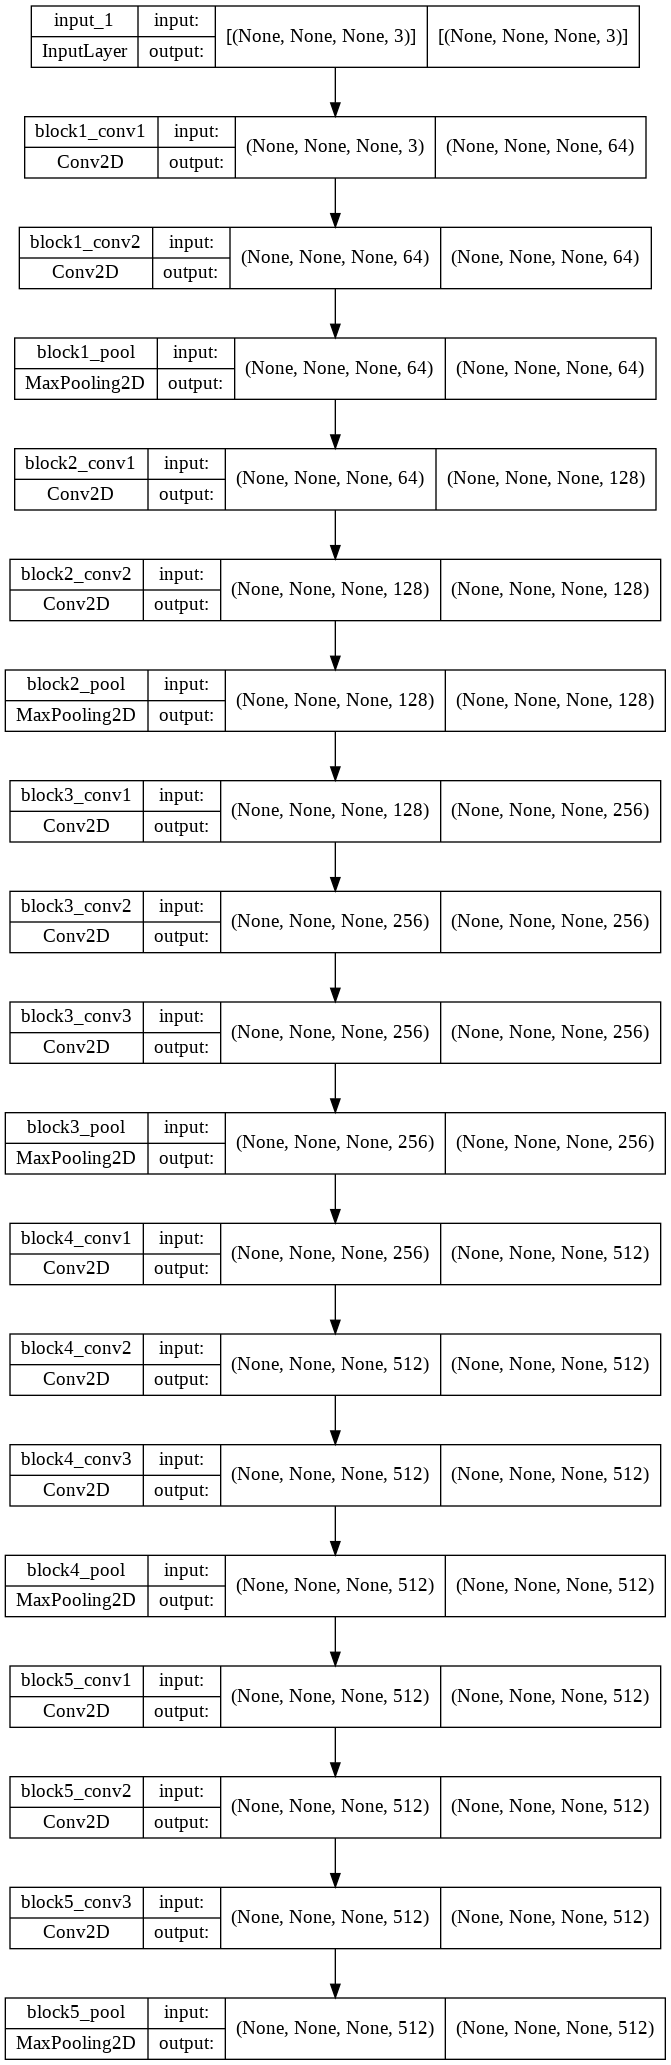

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(base_model, to_file=os.path.join(WORKING_DIR,'model_plot.png'), show_shapes=True, show_layer_names=True)

In [7]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

CLASSES = 6

x = base_model.output                          
x = GlobalAveragePooling2D(name='avg_pool')(x) 
x = Dropout(0.4)(x)                            

predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
base_model.trainable = False

In [9]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
epochs = 32
batch_size = 16

history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator
)

Epoch 1/32
27/27 [==============================] - 21s 338ms/step - loss: 5.2748 - accuracy: 0.4605 - val_loss: 1.9939 - val_accuracy: 0.7581
Epoch 2/32
27/27 [==============================] - 7s 259ms/step - loss: 3.1939 - accuracy: 0.6667 - val_loss: 9.7292 - val_accuracy: 0.4435
Epoch 3/32
27/27 [==============================] - 7s 261ms/step - loss: 2.4860 - accuracy: 0.7698 - val_loss: 0.8645 - val_accuracy: 0.8710
Epoch 4/32
27/27 [==============================] - 7s 264ms/step - loss: 2.0796 - accuracy: 0.7732 - val_loss: 1.1750 - val_accuracy: 0.8468
Epoch 5/32
27/27 [==============================] - 7s 263ms/step - loss: 2.2622 - accuracy: 0.7766 - val_loss: 1.1378 - val_accuracy: 0.8226
Epoch 6/32
27/27 [==============================] - 7s 266ms/step - loss: 1.8384 - accuracy: 0.7801 - val_loss: 0.9518 - val_accuracy: 0.8306
Epoch 7/32
27/27 [==============================] - 7s 266ms/step - loss: 1.3697 - accuracy: 0.8007 - val_loss: 2.1297 - val_accuracy: 0.7661
Epoch

12/12 [==============================] - 2s 174ms/step - loss: 1.0262 - accuracy: 0.8710
Test loss: 1.026
Test accuracy: 0.871


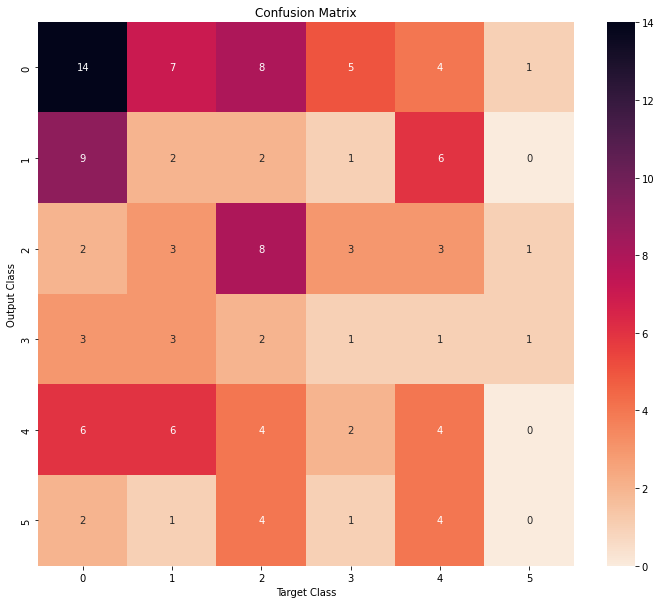

In [11]:
import seaborn as sn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_classified, y_true):
    c_mat = confusion_matrix(y_true, y_classified)

    labels = [f"{value:.0f}" for value in c_mat.flatten()]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class')

score = model.evaluate(validation_generator)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}') 

y_classified = np.argmax(model.predict(validation_generator), axis=1)
y_true =  validation_generator.classes

plot_confusion_matrix(y_classified, y_true)